In [6]:
from tensorflow.keras.datasets import cifar10
from keras.models import Sequential
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [8]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [9]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [14]:
cnn_model = Sequential()
cnn_model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D(pool_size=(2,2)))
cnn_model.add(layers.Dropout(0.3))

cnn_model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D(pool_size=(2,2)))
cnn_model.add(layers.Dropout(0.5))

cnn_model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D(pool_size=(2,2)))
cnn_model.add(layers.Dropout(0.5))

cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(128, activation='relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Dropout(0.5))
cnn_model.add(layers.Dense(10, activation='softmax'))
cnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_14 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_15 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [15]:
cnn_model.compile(optimizer='adam',
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [16]:
history = cnn_model.fit(x_train, y_train, batch_size=64, epochs=100, verbose=1, validation_split=0.1)

Epoch 1/100
704/704 [==============================] - 387s 542ms/step - loss: 1.7916 - accuracy: 0.3947 - val_loss: 1.3996 - val_accuracy: 0.4996
Epoch 2/100
704/704 [==============================] - 385s 547ms/step - loss: 1.2365 - accuracy: 0.5559 - val_loss: 1.1418 - val_accuracy: 0.5982
Epoch 3/100
704/704 [==============================] - 382s 542ms/step - loss: 1.0440 - accuracy: 0.6284 - val_loss: 1.1517 - val_accuracy: 0.6018
Epoch 4/100
704/704 [==============================] - 370s 525ms/step - loss: 0.9337 - accuracy: 0.6688 - val_loss: 0.8727 - val_accuracy: 0.7050
Epoch 5/100
704/704 [==============================] - 378s 537ms/step - loss: 0.8566 - accuracy: 0.7000 - val_loss: 0.7805 - val_accuracy: 0.7312
Epoch 6/100
704/704 [==============================] - 382s 542ms/step - loss: 0.7997 - accuracy: 0.7230 - val_loss: 0.7554 - val_accuracy: 0.7400
Epoch 7/100
704/704 [==============================] - 381s 541ms/step - loss: 0.7573 - accuracy: 0.7383 - val_loss: 0

704/704 [==============================] - 224s 318ms/step - loss: 0.3100 - accuracy: 0.8921 - val_loss: 0.3950 - val_accuracy: 0.8700
Epoch 57/100
704/704 [==============================] - 224s 318ms/step - loss: 0.3057 - accuracy: 0.8947 - val_loss: 0.4381 - val_accuracy: 0.8604
Epoch 58/100
704/704 [==============================] - 223s 317ms/step - loss: 0.3007 - accuracy: 0.8966 - val_loss: 0.3918 - val_accuracy: 0.8712
Epoch 59/100
704/704 [==============================] - 223s 317ms/step - loss: 0.3074 - accuracy: 0.8943 - val_loss: 0.4221 - val_accuracy: 0.8588
Epoch 60/100
704/704 [==============================] - 223s 317ms/step - loss: 0.2968 - accuracy: 0.8977 - val_loss: 0.4381 - val_accuracy: 0.8606
Epoch 61/100
704/704 [==============================] - 224s 318ms/step - loss: 0.3017 - accuracy: 0.8954 - val_loss: 0.4276 - val_accuracy: 0.8648
Epoch 62/100
704/704 [==============================] - 224s 317ms/step - loss: 0.2949 - accuracy: 0.8986 - val_loss: 0.4403 

Text(0.5, 1.0, 'Loss Curves')

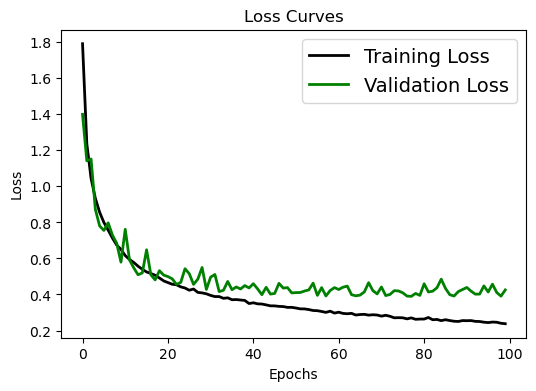

In [17]:

plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

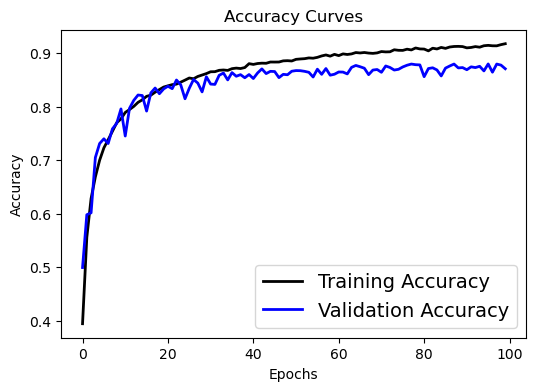

In [18]:
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)